# Decision tree

이 노트북은 `Decision tree`방법을 활용하는 방법에 대한 실습 내용을 담고 있습니다.

## Data import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

basicpath = '/content/drive/MyDrive/Univ/4-1/Data Science/Practice/9주차/'

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
file = 'mushrooms.csv'
data = pd.read_csv(os.path.join(basicpath, file))

In [4]:
data.head() # class p for poisonous, class e for edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data cleaning

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 데이터 특징

In [6]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
data.shape

(8124, 23)

In [8]:
data.groupby('class').size()

class
e    4208
p    3916
dtype: int64

## 데이터 변환 - label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# convert nominal type to numerical type
labelencoder = LabelEncoder() 
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
data.groupby('class').size()

class
0    4208
1    3916
dtype: int64

## 데이터 EDA - correlation

In [14]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Correlation ')

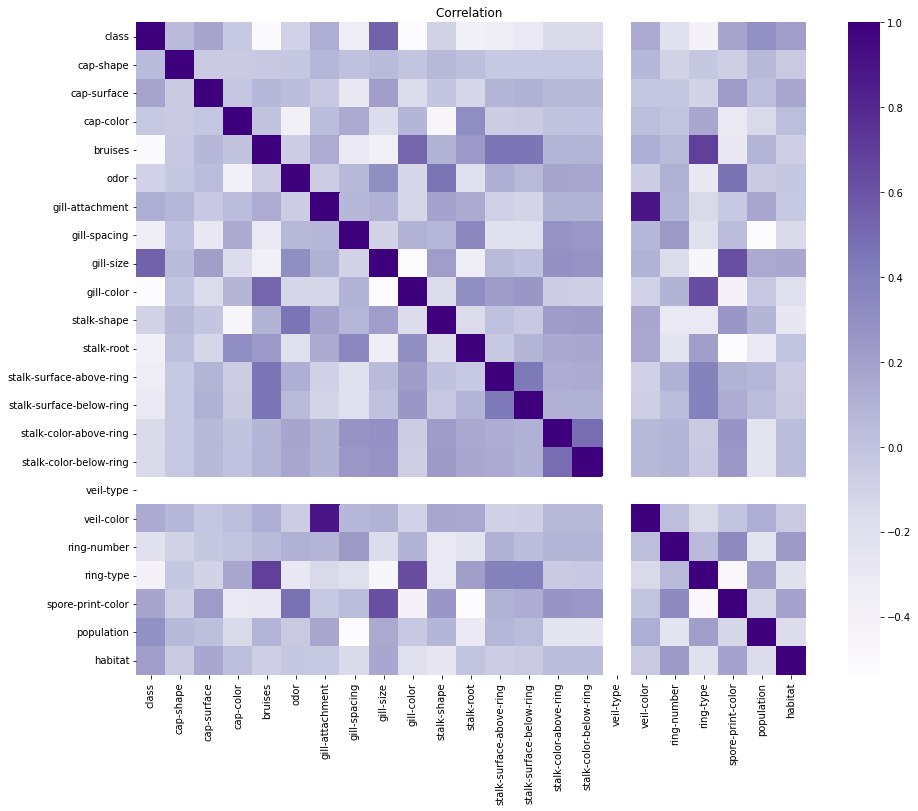

In [15]:
# 아직 배우지 않았기에 이런게 있다고 생각하고 넘어가세요.
# Correlation은 두 데이터 간의 상관관계 두 데이터가 얼마나 관련이 되어 있는가
# from -1 to 1
# correlation 절대값이 1에 가까울 수록 상관관계가 높다.
# correlation 값이 0에 가까우면 random 분포
# 각 칸은 해당하는 x, y column의 correlation을 나타낸 것
# 이렇게 값을 칸에 나타내는 방식을 히트맵(?)이라고 한대
# 대각선은 자기 자신과의 correlation을 본 것이기 때문에 의미는 별로 없다.
# class에 대한 correlation을 봤을 때, 높은 correlation을 갖는 애들도
# 낮은 correlation을 갖는 애들도 있다.
# 우리가 decision tree를 활용해야겠다고 마음을 먹었을 때
# 지금처럼 class에 대한 correlation 분포가 다양하면 아주 이상적이야
# 왜냐하면 decision tree는 hierarchical 해, 가장 좋은 test attr.를 고르고
# 그걸 기준으로 나누는데, 이렇게 class 의 상관관계가 다른것들이 있으면
# class 랑 관계 높은걸 먼저 자르고 그렇게 해도 되는거죠
# 사실 우리가 자르는 방법은 homogeneous 한 애들 기준으로 잡는데
# homogeneous 와 correlation과 관계가 있어, 이건 따로 얘기해야 하지만
# correlation이 치우치지 않았다면 linear regression, svm이 더 어울리고
# 치우쳐서 hierarchical하면 decision tree 같은 것들이 좋아 그런 hierarchical한거

import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [16]:
corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

## Decision tree 적용

### Training, testing data split

In [17]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [18]:
X.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


In [19]:
y.head(3)

0    1
1    0
2    0
Name: class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### 과제3. Decision tree 모델 구현

#### 과제3-1. Information gain 계산 구현

In [22]:
def entropy(class_column):
    """1d array 데이터를 받아 해당 데이터의 entropy를 계산하여 반환
    
    Parameters
    ----------
    class_column: np.array
        entropy 계산을 위한 1d array
    
    return
    ----------
    float
        entropy 값
    """
    
    #답변1

    unique_values, values_count = np.unique(class_column, return_counts=True)

    entropy = 0
    for i in range(len(unique_values)):
      pi = values_count[i] / np.sum(values_count)
      entropy += -pi * np.log2(pi)

    return entropy


In [24]:
a, b = np.unique([1,0,0,0,0,0,1], return_counts=True)
print(a)
print(b)

[0 1]
[5 2]


In [ ]:
def Info_gain(X, y, split_index):
    """데이터를 특정 column의 values를 기준으로 분할 하였을 때의
    information gain을 계산하여 반환
    
    Parameters
    ----------
    X: np.array
        Training data의 class를 제외한 attributes
        
    y: np.array
        Training data의 class label
        
    split_index: integer
        X를 특정 column으로 분할할 때, 해당 column의 index
        X[:, split_index]가 분할의 기준 column이 됨
    
    return
    ----------
    float
        Information gain 값
    """
    
    #답변2

    total_entropy = entropy(y)
    

#### 과제3-2. Decision tree 알고리즘 구현

In [ ]:
def DecisionTree(X_train, y_train):

    # 다양한 open source를 보면 (Linux system 등) dictionary를 많이 사용해요
    # dictionary를 쓰면 탐색속도가 O(1)이기 때문에 좋아요
    '''
    {B: {0 (attr. value): {c (attr. value): , ...},
         1 (attr. value): 0 (claas value),
         2 (attr. value): {a (attr. value): , ...},
        }
    }
    sub-tree를 갖던지 value를 갖던지, dictionary를 활용하여 tree 자료구조를 만들 수 있다.
    scikit에서는 이렇게 dictionary를 만든다.
    '''
    def _majority_vote(y):
        """y에 대한 majority voting
        Parameters
        ----------
        y: np.array
            Class labels의 배열
        return
        ----------
        integer
            y의 unique values중 가장 많은 갯수를 가지는 value
        """
        #답변3
        # np.argmax는 가장 많은 element의 index를 return
        major_index = np.argmax(np.unique(y, return_counts=True)[1])

        return major_index 


    # column의 shape를 바탕으로 array를 만든다
    # column의 개수가 5개라고 했을 때,, 1짜리 5개 만들어서 한번 썼으면 0으로 마킹할거야
    # ex. [1, 1, 1, 1, 1] -> [1, 1, 0, 1, 1] 그래야 1인 것들만 gain값 구할거니까
    columns = np.full(X_train.columns.shape, 1)
    # pandas dataframe 를 직접 다루면 너무 느리기 때문에 numpy로 바꾼다
    X = X_train.values
    y = y_train.values
    all_y_majority = _majority_vote(y)
    
    def _TrainTree(X, y, remain_columns):
        """ Decision tree 메인 알고리즘.
        ID3 알고리즘을 따름
        ID3:
            Root node r을 생성

            if 데이터의 class값이 동일하면:
                return 해당 class 값
            if 더이상 분류할 데이터가 남아있지 않으면:
                return 전체 데이터의 majority class
            if 더이상 분류 기준으로 활용할 feature가 없으면:
                return 남은 데이터의 majority class
                
            remain_columns의 각 feature를 기준으로 information gain 계산
            현재 데이터를 어떤 feature를 기준으로 분할할지 gain을 기반으로 판단
            데이터를 분할하여 각각의 서브 데이터에 대해 ID3알고리즘 재귀 수행
            
        Parameters
        ----------   
        X: np.array
            Training data의 class를 제외한 attributes
            
        y: np.array
            Training data의 class label
            
        remain_columns: np.array
            X가 (m, n)의 shape을 가질 때, 
            (n, )의 shape을 가지는 array
            각 value는 X의 각 feature를 의미하며, 1로 초기화 되었다가
            split feature로 지정된 value를 0으로 변경
        
            
        Return
        ----------
        Dictionary
            구성한 decision tree를 반환
            Dictionary 형태가 아니어도 무관.
            
            Dictionary 형태를 가질 경우, 
            dictionary의 key가 child를 가리키는 pointer역할을 하며
                        value는 node의 역할을 함
            이때 key는 decision tree에서 split feature index이며, 
            value는 sub tree 혹은 class label
        """
        #답변 4
 
        # All target values have the same value
        # end condition
        if np.unique(y).shape[0] <= 1:
          return y[0]
        

        #더이상 분류할 데이터가 없는 경우
        elif X.shape[0] == 0: # X가 더이상 없을 때
          return all_y_majority


        # 더이상 분류할 feature가 없는 경우 
        # 같은건 True로 다른건 False로 나올건데
        # False가 나온다는건 True값이 더이상 없다는거죠
        elif (remain_columns == columns).max() == False:
          return _majority_vote(y) # 지금 가지고 있는 y subtree 에 대한 majority vote를 시켜준다


        # 메인 Algorithm
        # 내가 쓸 수 있는 column들은 뭐지? 를 확인해야해
        # 값이 1인것들의 index를 가져오기 위해서 np.where를 가져올거야
        # 우리가 쓰고 남은 column들이 나올거야
        remain_col_indicies = np.where(remain_columns == 1)[0]
        gains = [Info_gain(X, y, column_index) for column_index in remain_col_indicies]
        best_index = remain_col_indicies[np.argmax(gains)]

        tree = {best_index:{}}

        for value in np.unique(X[:, best_index]):
          mask = X[:, best_index] == value
          sub_X = X[mask]
          sub_y = y[mask]

          subtree = _TrainTree(sub_X, sub_y, remain_columns)

          tree[best_index][value] = subtree
        
        return tree


    #Run training
    tree = _TrainTree(X, y, columns)
    return tree
    

In [ ]:
# parameter로 들어온 list에 대해서 True값에 해당되는 것들에 index를 반환한다.
np.where([0,1,0,1,0])

(array([1, 3]),)

In [ ]:
def predict(X, tree):
    """Decision tree predict.
    Decision tree의 output을 dictionary형태로 맞춘 경우 활용 가능"""
    X = X.values
    def _predict(X, tree):
        key = list(tree.keys())[0]

        result = tree[key][X[key]]
        if isinstance(result, dict):
            return _predict(X, result)

        else:
            return result
        
    result = [_predict(one_X, tree) for one_X in X]
    return result
        

In [ ]:
trained_tree = DecisionTree(X_train, y_train)

In [ ]:
trained_tree

## Model Test

Test를 위해 모델에 test 데이터를 입력하여 보겠습니다.

In [ ]:
predict = predict(X_test, trained_tree) # 모델 predict값 생성

### 정확도 판단

### 1. Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion matrix의 row는 정답, true label을 의미하고 column은 예측값, predict label을 의미합니다.

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

### 2. Precision, recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_test, predict))

In [ ]:
print(recall_score(y_test, predict))